This notebook tests out-of-shelf resnet50 model on one photo for each of the following 10 items:
['boxspring','vacuum','lamp','alarm clock','hair dryer','sofa','cabinet','high chair','coffee maker','washer']

In this small sample, the model correctly identified 7 out of 10 photos. 

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, patheffects

model = ResNet50(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
def draw_text(ax, xy, txt, sz=14, color = 'black'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)
    
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

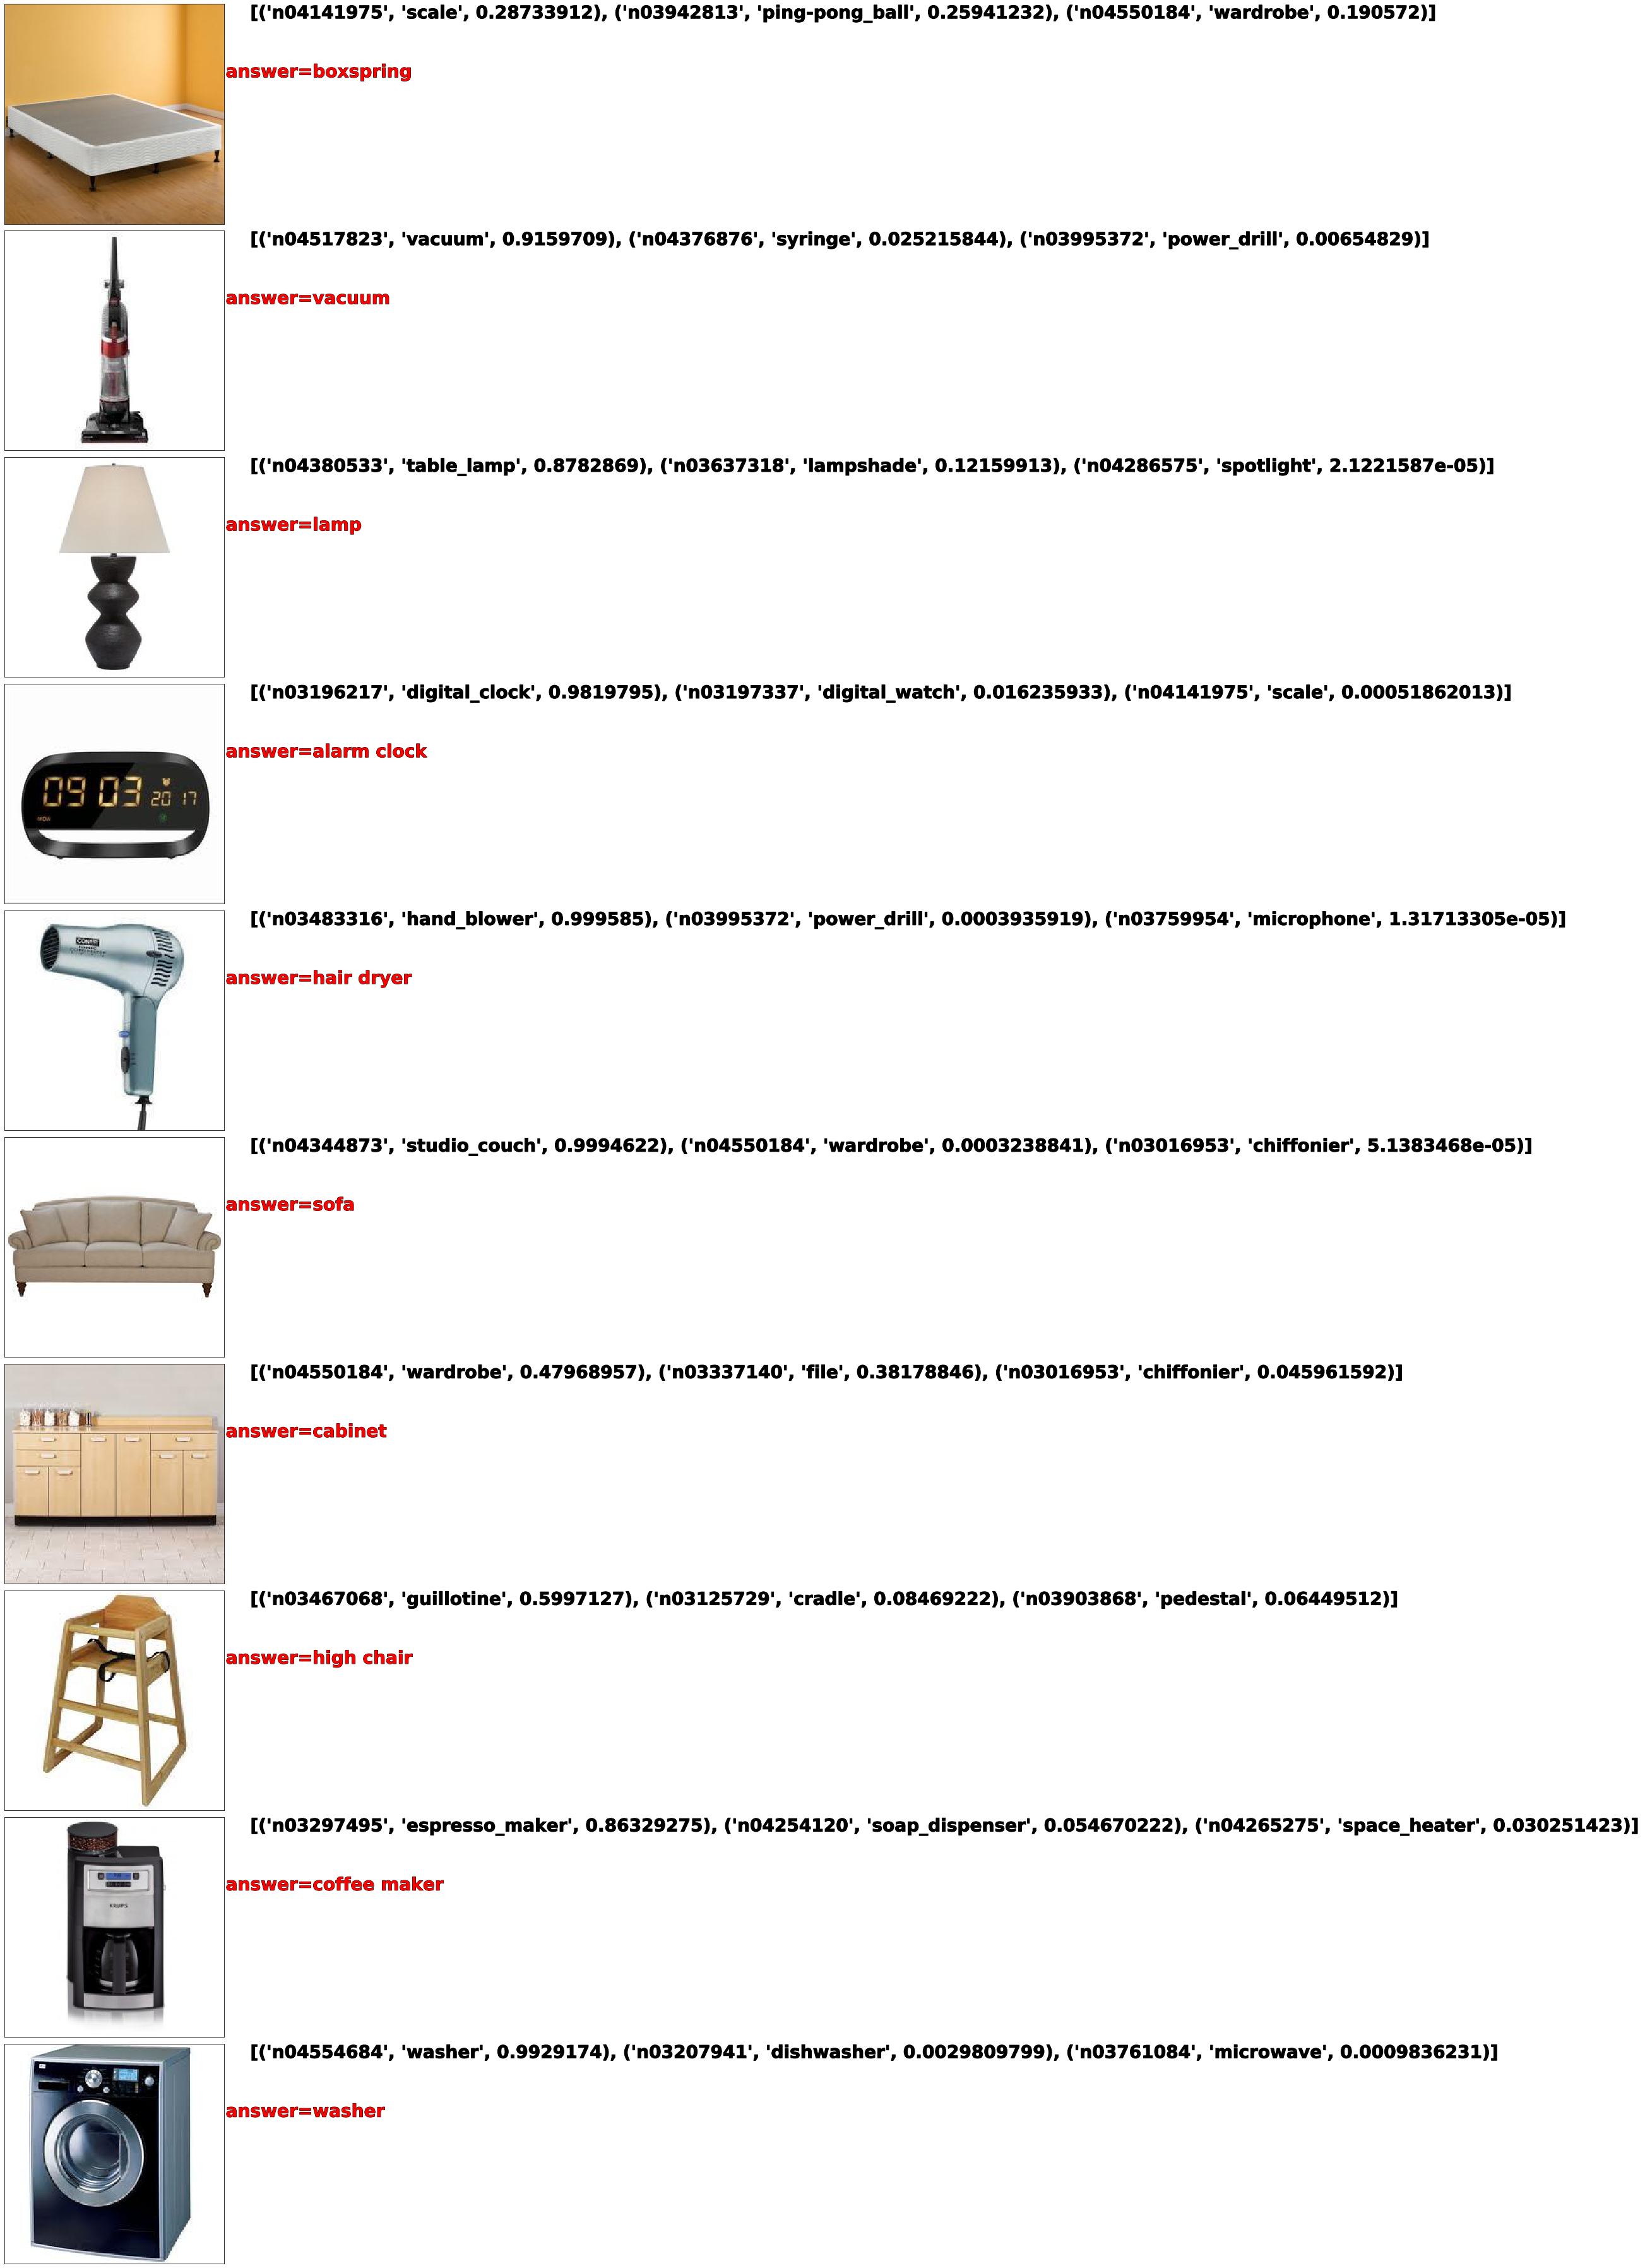

In [5]:
# model = resnet50
# regular size pic = (224,224)
# 7 right, 3 wrong
# wrong: boxspring, cabinet, high chair
# right: vacuum, lamp, clock, dryer, sofa(couch), coffee maker, washer
answers = ['boxspring','vacuum','lamp','alarm clock','hair dryer','sofa','cabinet','high chair','coffee maker',
           'washer']
fig, axes = plt.subplots(len(answers), 1, figsize=(48, 50))
for i,ax in enumerate(axes.flat):
    img_id = i + 1
    correct_answer = answers[i]
    img_path = 'regsize/img'+str(img_id)+'.jpg'
    ima = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(ima)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    b = decode_predictions(preds, top=3)[0]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (250,0), b, 28)
    draw_text(ax, (225,60), 'answer='+str(correct_answer), 28,'red')
    
plt.tight_layout()